**Laboratorio # 1**

---


El dataset y codigo se encuentran almacenados en el repositorio de git hub

> Link de github:https://github.com/R1mber/sis421/tree/master/Laboratorios/Laboratorio%201


In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from skimage import io

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import shutil
shutil.copy("/content/drive/MyDrive/inteligencia_artificial/ia2/laboratorio/transito.zip", "transito.zip")

'transito.zip'

In [4]:
import shutil

shutil.unpack_archive("transito.zip")

In [5]:
path_train = '/content/train/'
path_test = '/content/test/'
directorios_train = os.listdir(path_train)
directorios_test = os.listdir(path_test)
directorios_test

['ciclovia', 'peatones', 'stop']

In [6]:
labels_def = {'peatones':0, 'ciclovia':1, 'stop':2}


In [7]:
images_train = []
labels_train = []
for d in directorios_train:
   imagenes = os.listdir(path_train + d)
   for i in imagenes:
       imgPath2 = path_train + d + '/' + i
       img1 = Image.open(imgPath2)
       new_img = img1.resize((32,32))
       images_train.append(np.array(new_img)/255)
       labels_train.append(labels_def[d])
       #img = io.imread(imgPath)/255.0
     

In [8]:

images_test = []
labels_test = []
for d in directorios_test:
   imagenes = os.listdir(path_test + d)
   for i in imagenes:
       imgPath = path_test + d + '/' + i
       img = Image.open(imgPath)
       new_img = img.resize((32,32))
       images_test.append(np.array(new_img)/255)
       labels_test.append(labels_def[d])
       #img = io.imread(imgPath)/255.0
     

In [9]:
X_test= np.asarray(images_test)
y_test_ = np.asarray(labels_test)   

In [10]:
X_test.shape

(18, 32, 32, 3)

In [11]:
x = np.asarray(images_train)
y = np.asarray(labels_train)
print(x.shape)
#print(y)

(528, 32, 32, 3)


stop


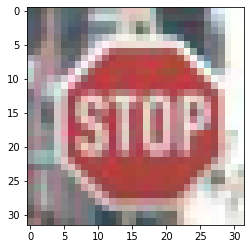

In [12]:
def getText(label):
    for key in labels_def:
      if labels_def[key] == label:
        print(key)

def printImage(imageId):
  label = y[imageId]
  plt.imshow(x[imageId])
  getText(label)
printImage(400)

In [13]:
dims = x.shape[1] * x.shape[2] * x.shape[3]
x = x.reshape(x.shape[0], dims)


In [14]:
dims2 = X_test.shape[1] * X_test.shape[2] * X_test.shape[3]
X_test = X_test.reshape(X_test.shape[0], dims2)

In [15]:
x.shape


(528, 3072)

In [16]:
x.shape, y.shape

((528, 3072), (528,))

In [17]:
#y = y[:20].astype(np.int)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [18]:
#funciondes de activacion
def relu(x):
  return np.maximum(0, x)

def reluPrime(x):
  return x > 0

In [19]:
def linear(x):
    return x

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=-1,keepdims=True)

In [20]:
# Binary Cross Entropy -> usada para clasificación binaria (con sigmoid)
def bce(y, y_hat):
    return - np.mean(y.reshape(y_hat.shape)*np.log(y_hat) - (1 - y.reshape(y_hat.shape))*np.log(1 - y_hat))

# Cross Entropy (aplica softmax + cross entropy de manera estable) -> usada para clasificación multiclase
def crossentropy(y, y_hat):
    logits = y_hat[np.arange(len(y_hat)),y]
    entropy = - logits + np.log(np.sum(np.exp(y_hat),axis=-1))
    return entropy.mean()

In [21]:
def grad_bce(y, y_hat):
    return y_hat - y.reshape(y_hat.shape)

def grad_crossentropy(y, y_hat):
    answers = np.zeros_like(y_hat)
    answers[np.arange(len(y_hat)),y] = 1    
    return (- answers + softmax(y_hat)) / y_hat.shape[0]

In [22]:
class MLP():
  def __init__(self, D_in, H, D_out, loss, grad_loss, activation):
    # pesos de la capa 1
    self.w1, self.b1 = np.random.normal(loc=0.0,
                                  scale=np.sqrt(2/(D_in+H)),
                                  size=(D_in, H)), np.zeros(H)
    # pesos de la capa 2
    self.w2, self.b2 = np.random.normal(loc=0.0,
                                  scale=np.sqrt(2/(H+D_out)),
                                  size=(H, D_out)), np.zeros(D_out)
    self.ws = []
    # función de pérdida y derivada
    self.loss = loss
    self.grad_loss = grad_loss
    # función de activación
    self.activation = activation

  def __call__(self, x):
    # salida de la capa 1
    self.h_pre = np.dot(x, self.w1) + self.b1
    self.h = relu(self.h_pre)
    # salida del MLP
    y_hat = np.dot(self.h, self.w2) + self.b2 
    return self.activation(y_hat)
    
  def fit(self, X, Y, epochs = 100, lr = 0.001, batch_size=None, verbose=True, log_each=1):
    batch_size = len(X) if batch_size == None else batch_size
    batches = len(X) // batch_size
    l = []
    for e in range(1,epochs+1):     
        # Mini-Batch Gradient Descent
        _l = []
        for b in range(batches):
            # batch de datos
            x = X[b*batch_size:(b+1)*batch_size]
            y = Y[b*batch_size:(b+1)*batch_size] 
            # salida del perceptrón
            y_pred = self(x) 
            # función de pérdida
            loss = self.loss(y, y_pred)
            _l.append(loss)        
            # Backprop 
            dldy = self.grad_loss(y, y_pred) 
            grad_w2 = np.dot(self.h.T, dldy)
            grad_b2 = dldy.mean(axis=0)
            dldh = np.dot(dldy, self.w2.T)*reluPrime(self.h_pre)      
            grad_w1 = np.dot(x.T, dldh)
            grad_b1 = dldh.mean(axis=0)
            # Update (GD)
            self.w1 = self.w1 - lr * grad_w1
            self.b1 = self.b1 - lr * grad_b1
            self.w2 = self.w2 - lr * grad_w2
            self.b2 = self.b2 - lr * grad_b2
        l.append(np.mean(_l))
        # guardamos pesos intermedios para visualización
        self.ws.append((
            self.w1.copy(),
            self.b1.copy(),
            self.w2.copy(),
            self.b2.copy()
        ))
        if verbose and not e % log_each:
            print(f'Epoch: {e}/{epochs}, Loss: {np.mean(l):.5f}')

  def predict(self, ws, x):
    w1, b1, w2, b2 = ws
    h = relu(np.dot(x, w1) + b1)
    y_hat = np.dot(h, w2) + b2
    return self.activation(y_hat)

In [23]:
# MLP para clasificación binaria
class MLPBinaryClassification(MLP):
    def __init__(self, D_in, H, D_out):
        super().__init__(D_in, H, D_out, bce, grad_bce, sigmoid)

# MLP para clasificación multiclase
class MLPClassification(MLP):
    def __init__(self, D_in, H, D_out):
        super().__init__(D_in, H, D_out, crossentropy, grad_crossentropy, linear)

In [24]:
model2 = MLPClassification(D_in=3072, H=100, D_out=3)
epochs = 1000
lr = 0.02
model2.fit(x, y, epochs, lr, batch_size=10, log_each=100)

Epoch: 100/1000, Loss: 0.07072
Epoch: 200/1000, Loss: 0.03625
Epoch: 300/1000, Loss: 0.02442
Epoch: 400/1000, Loss: 0.01844
Epoch: 500/1000, Loss: 0.01482
Epoch: 600/1000, Loss: 0.01239
Epoch: 700/1000, Loss: 0.01065
Epoch: 800/1000, Loss: 0.00934
Epoch: 900/1000, Loss: 0.00832
Epoch: 1000/1000, Loss: 0.00750


Precision con datos de entrenamiento


In [25]:
y_predict_ = model2.predict(model2.ws[999], x)
y_pred_train=[]
for i in y_predict_:
    y_pred_train.append(np.argmax(i))
    #print(np.argmax(i))

In [26]:
def accuracy(y_pred, y):
    return np.sum(y_pred == y) / len(y)

In [27]:
accuracy(y_pred_train, y)

1.0

Calculamos la precisión con datos de prueba

In [28]:
y_predict_test = model2.predict(model2.ws[999], X_test)
y_pred_test=[]
for i in y_predict_test:
    y_pred_test.append(np.argmax(i))
    #print(np.argmax(i))

In [29]:
def accuracy_(y_pred, y_t):
    return np.sum(y_pred == y_t) / len(y_t)

In [31]:
accuracy_(y_pred_test, y_test_)

0.9444444444444444